# Research Objective

To Classify High Risk Patients for Heart Disease in Long Run


In [7]:
#Load all Python Packages for Loading and Manipulating Data

import pandas as pd
import numpy as np

#Load all Packages for Data Visualization

import seaborn as sns

from matplotlib import pyplot as plt

#Load all the Packages for the Data Visualization

import sklearn

# is a magic function that renders the visualization in Jupyter Notebook

%matplotlib inline 





In [10]:
#loading Dataset

import os # the function that the OS module provides you to interface with the underlying sys python is running on

os.getcwd() # identify the current working dir

heartrisk = pd.read_csv('framingham_lyst9325.csv')


In [11]:
#Understand how my data really looks like
heartrisk.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
#structure of the Dataset

heartrisk.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [15]:
# Identify the total number of missing Values in each column

print(heartrisk.isnull().sum())


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [18]:
#Median Imputation of Continous data
'''
heartrisk.glucose = heart_risk['glucose'].transform(impute_median)
heartrisk.education = heart_risk['education'].transform(impute_median)
heartrisk.heartRate = heart_risk['heartRate'].transform(impute_median)
heartrisk.totChol = heart_risk['totChol'].transform(impute_median)
heartrisk.BPMeds = heart_risk['BPMeds'].transform(impute_median)

'''
def impute_median (series):
    return series.fillna(series.median())

heartrisk.glucose = heartrisk['glucose'].transform(impute_median)
heartrisk.education = heartrisk['education'].transform(impute_median)
heartrisk.heartRate = heartrisk['heartRate'].transform(impute_median)
heartrisk.totChol = heartrisk['totChol'].transform(impute_median)
heartrisk.BPMeds = heartrisk['BPMeds'].transform(impute_median)

print(heartrisk.isnull().sum())

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay         29
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                19
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64


In [20]:
#Impute for only Smokers

by_currentSmoker_class=heartrisk.groupby(['currentSmoker'])

#allows grouping class of observations Yes/No

heartrisk.cigsPerDay=by_currentSmoker_class['cigsPerDay'].transform(impute_median)

print(heartrisk.isnull().sum())

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                19
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64


In [23]:
#Univariate Analysis

heartrisk.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4221.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.800801,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.079840,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


C:\Users\aasnani\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Agewise distribution of Subjects')

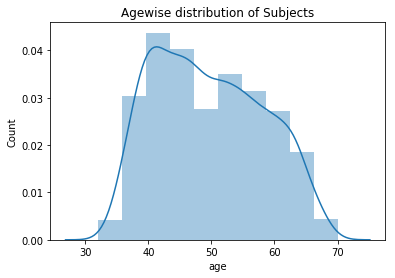

In [25]:
# what is the Agewise Distribution on subjects understudy? Whic age groups are promienently represented

sns.distplot(heartrisk['age'],bins=10,kde=True)
plt.ylabel('Count')
plt.title('Agewise distribution of Subjects')

''We have bimodal distribution of the age with 2 prominent peaks at around 40 to 45 years. The second peak occurs at around 55 t 60 years



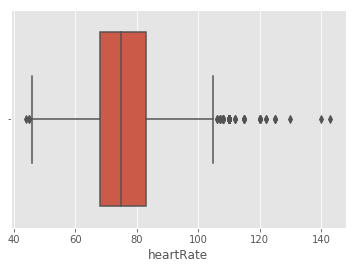

In [26]:
#find Heart Rate

from matplotlib import style
style.use('ggplot')

sns.boxplot(x='heartRate',data = heartrisk)

C:\Users\aasnani\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


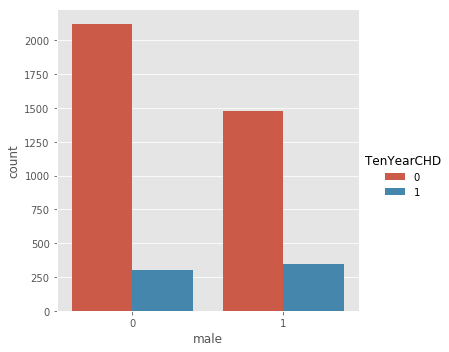

In [27]:
#What was observed the heart Risk on the basis of gender in ten years timeframe

#create object hr , and using datavalue as male
hr = sns.factorplot(x='male',hue='TenYearCHD' , data=heartrisk , kind='count')



C:\Users\aasnani\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


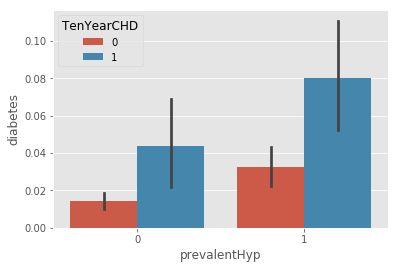

In [30]:
#is the hypertension and diabetes influencing heart risk in all the subjects over a 10 year period

sns.barplot('prevalentHyp', 'diabetes' , data = heartrisk , hue='TenYearCHD')

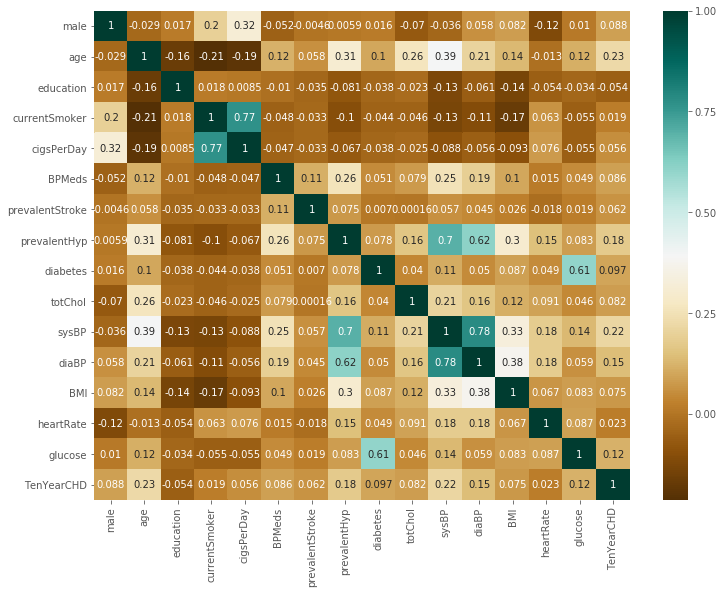

In [34]:
plt.figure(figsize=(12,9))
sns.heatmap(heartrisk.corr(), cmap = 'BrBG' , annot=True)